In [24]:
import sys
sys.path.append(".")

import numpy as np
import matplotlib.pyplot as plt

In [174]:
import post
import post_config
import importlib
importlib.reload(post)
importlib.reload(post_config)

import dataset_builder
import models.six_stage_linear_model as model
import default_config as cfg
import local_storage_config as storage_cfg

cfg.__dict__.update(storage_cfg.__dict__)

In [38]:
model_ds=model.ModelDatasetComponent(cfg)
tfrecord_files=dataset_builder.get_tfrecord_filenames(cfg.TRAIN_TFRECORDS,cfg)
#tfrecord_files_valid.sort()
print("Found the following validation TFrecords:\n","\n".join(tfrecord_files))
print("Building training dataset")
ds=dataset_builder.build_validation_ds(tfrecord_files,model_ds.place_training_labels,cfg)
print("Validation dataset shape:",ds)

Retrieving TFrecords from: C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords/training
Found the following validation TFrecords:
 C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-001.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-002.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-003.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-004.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-005.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-006.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-007.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-008.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmenta

In [107]:
it=iter(ds)

In [191]:
st=next(it)

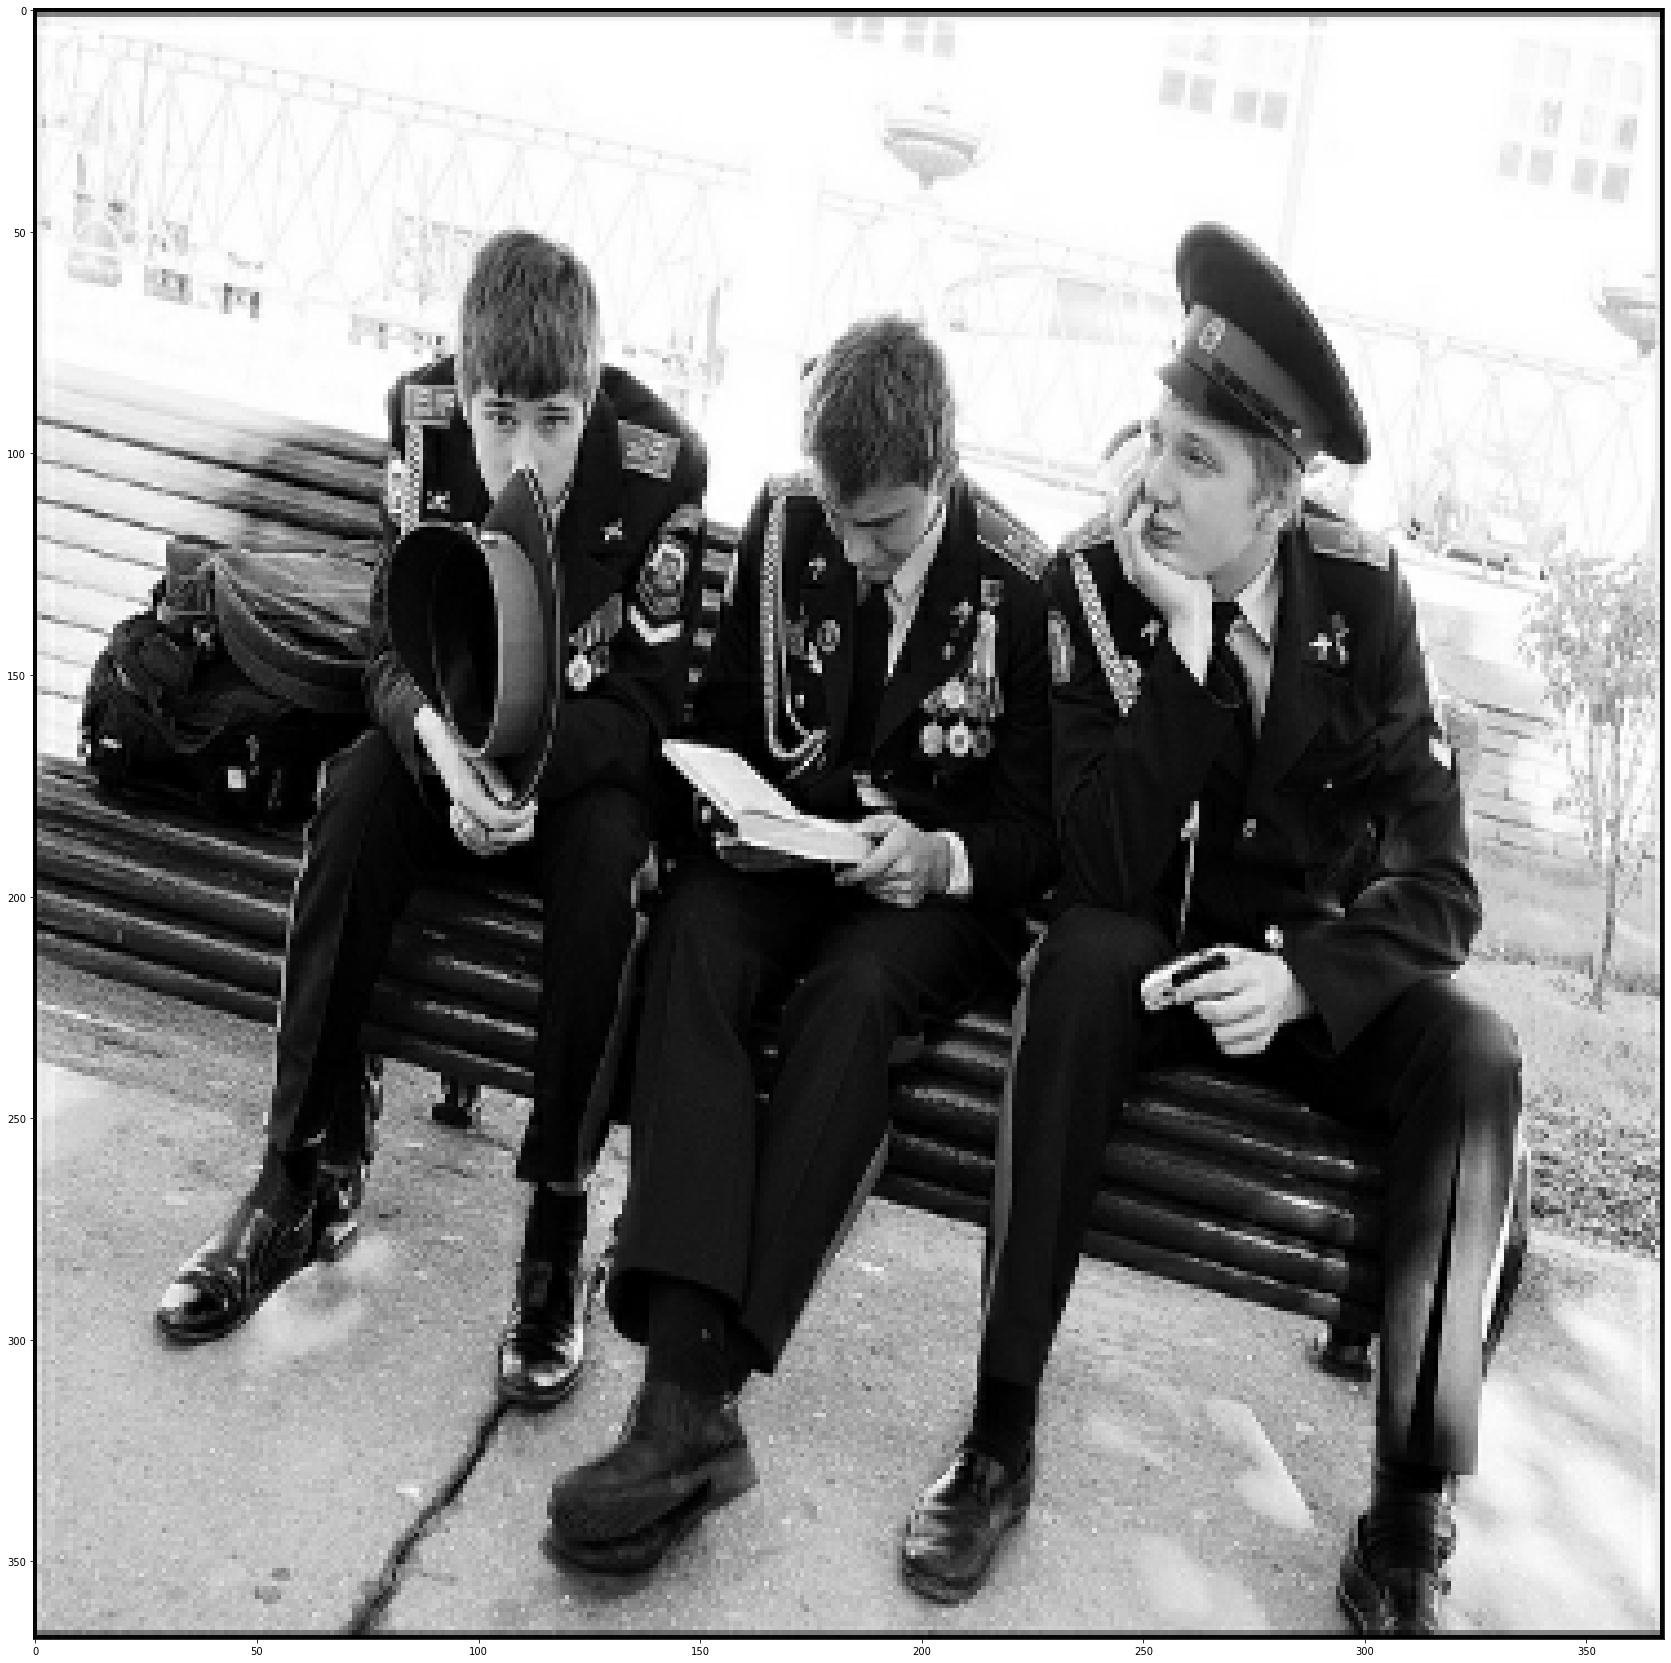

In [200]:
img=st[0][0][0].numpy()
#img=tf.image.resize(img,(46,46))
kpts=st[1][5][0].numpy()
pafs=st[1][0][0].numpy()
plt.figure(figsize=(30,30))
plt.imshow(img)

In [199]:
import keypoints_config as kc

post.Skeletonizer.config(kc.KEYPOINTS_DEF,kc.JOINTS_DEF,post_config)
post.Skeleton.config(kc.KEYPOINTS_DEF,kc.JOINTS_DEF)

sk=post.Skeletonizer(kpts,pafs)
%timeit skeletons=sk.create_skeletons()

1.39 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


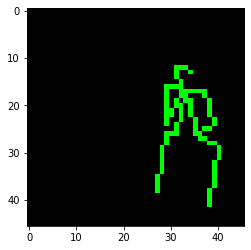

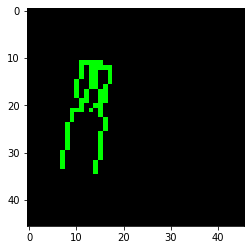

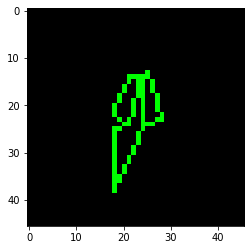

In [196]:
for skeleton in skeletons:
    img = np.zeros((46,46,3)) * 255
    skeleton.draw_skeleton(img)
    plt.imshow(img)
    plt.show()

